In [1]:
import math

In [2]:
from scipy import stats
import pickle as pkl
import pandas as pd

In [3]:
from sklearn.utils import resample
from statistics import mean, median

In [4]:
def ranksumdiff(a,b):
	totalpoints = []
	for i in a:
		totalpoints.append(i)
	for i in b:
		totalpoints.append(i)

	totalpoints.sort()
	rank_points = {}
	c = 1
	for i in totalpoints:
		if(i not in rank_points):
			rank_points[i] = []
		rank_points[i].append(c)
		c+=1
	rank_value = {}
	for i in rank_points:
		rank_value[i] = mean(rank_points[i])
	ars = []
	brs = []

	for i in a:
		ars.append(rank_value[i])

	for i in b:
		brs.append(rank_value[i])

	return mean(ars) - mean(brs)

def bootstrap(a, b, u0, iterations):
	n_iter = iterations
	m = len(a)
	n = len(b)
	centreu = (m*n)/2
	totallist = []
	for i in a:
		totallist.append(i)
	for i in b:
		totallist.append(i)
	count = 0
	totallist = np.asarray(totallist)
	for i in range(n_iter):
		sample = np.random.choice(totallist, m+n, replace=True)
		samplea = sample[:m]
		sampleb = sample[m:]
		u,p = stats.mannwhitneyu(samplea, sampleb, alternative='two-sided')
		if(abs(u-centreu)>=abs(u0-centreu)):
			count+=1
# 	print(count)
	return count/n_iter

def mannwhitneyu_bootstrap(low, high, iterations):
	u,p = stats.mannwhitneyu(low, high, alternative='two-sided')
	if ranksumdiff(low, high)>0:
		dom = "Low"
	else:
		dom = "High"
	bpval = ''
	if(p<0.05):
		bpval = bootstrap(low, high, u, iterations)
	return str(u)+", "+str(p)+"("+dom+", "+str(bpval)+")"

In [5]:
def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2, alternative='two-sided')
    
    return (u_statistic, p_value)


In [6]:
import numpy as np
def median(x):
    return np.median(np.array(x))


In [7]:
def Get_Users_topandbottom(dataset, pers, num):
    distril = []
    distrih = [] 

    temp1 = {}
    temp2 = {}
    for i in dataset:
        temp1[i] = dataset[i][pers]
        temp2[i] = dataset[i][pers]

    temp1 = dict(sorted(temp1.items(), key=lambda item: item[1], reverse=False))
    temp2 = dict(sorted(temp2.items(), key=lambda item: item[1], reverse=True))

    t = 0
    b = 0
    for i in temp1:
        if dataset[i]['Ext_song_plays'] >= th_songs and dataset[i]['Ext_song_plays']/dataset[i]['Total_song_plays'] >= th_hitrate:
            distril.append(dataset[i]['Instr_unique_song_plays']/dataset[i]['Ext_song_plays'] * 100)
        t += 1
        if t == num:
            break

    for i in temp2:
        if dataset[i]['Ext_song_plays'] >= th_songs and dataset[i]['Ext_song_plays']/dataset[i]['Total_song_plays'] >= th_hitrate:
            distrih.append(dataset[i]['Instr_unique_song_plays']/dataset[i]['Ext_song_plays'] * 100)
        b += 1
        if b == num:
            break
    return distril, distrih


In [8]:
def Get_Users(dataset, pers, med):
    distril = []
    distrih = []

    for i in dataset:
        if dataset[i][pers] <= median(med) - th_median and dataset[i]['Ext_song_plays'] >= th_songs\
        and dataset[i]['Ext_song_plays']/dataset[i]['Total_song_plays'] >= th_hitrate:
            distril.append(dataset[i]['Instr_unique_song_plays']/dataset[i]['Ext_song_plays'] * 100.0)
        if dataset[i][pers] >= median(med) + th_median and dataset[i]['Ext_song_plays'] >= th_songs\
        and dataset[i]['Ext_song_plays']/dataset[i]['Total_song_plays'] >= th_hitrate:
            distrih.append(dataset[i]['Instr_unique_song_plays']/dataset[i]['Ext_song_plays'] * 100.0)
    return distril, distrih


# Full Listening History

In [9]:
LastFMLH = pkl.load(open('../data/LastFM_lh_vectors.pkl', 'rb'))

In [10]:
hitrate = []
for i in LastFMLH:
    hitrate.append((LastFMLH[i]['Ext_song_plays']/LastFMLH[i]['Total_song_plays']))


In [11]:
np.median(np.array(hitrate))

0.7737704918032787

# General Parameters

In [12]:
th_median = 0.25
th_songs = 100
th_hitrate = 0.1

In [13]:
ope = []
for i in LastFMLH:
    ope.append(LastFMLH[i]['open'])
median(ope)

4.25

In [14]:
distriopenl,distriopenh = Get_Users(LastFMLH, 'open', ope)

In [15]:
distriopenl100,distriopenh100 = Get_Users_topandbottom(LastFMLH, 'open', 100)
distriopenl250,distriopenh250 = Get_Users_topandbottom(LastFMLH, 'open', 250)

In [16]:
con = []
for i in LastFMLH:
    con.append(LastFMLH[i]['con'])
median(con)

3.0

In [17]:
districonl,districonh = Get_Users(LastFMLH, 'con', con)

In [18]:
districonl100,districonh100 = Get_Users_topandbottom(LastFMLH, 'con', 100)
districonl250,districonh250 = Get_Users_topandbottom(LastFMLH, 'con', 250)

In [19]:
ext = []
for i in LastFMLH:
    ext.append(LastFMLH[i]['ext'])
median(ext)

2.25

In [20]:
distriextl,distriexth = Get_Users(LastFMLH,'ext', ext)

In [21]:
distriextl100,distriexth100 = Get_Users_topandbottom(LastFMLH, 'ext', 100)
distriextl250,distriexth250 = Get_Users_topandbottom(LastFMLH, 'ext', 250)

In [22]:
agr = []
for i in LastFMLH:
    agr.append(LastFMLH[i]['agr'])
median(agr)

4.0

In [23]:
distriagrl,distriagrh = Get_Users(LastFMLH, 'agr', agr)

In [24]:
distriagrl100,distriagrh100 = Get_Users_topandbottom(LastFMLH, 'agr', 100)
distriagrl250,distriagrh250 = Get_Users_topandbottom(LastFMLH, 'agr', 250)

In [25]:
neu = []
for i in LastFMLH:
    neu.append(LastFMLH[i]['neu'])
median(neu)

3.0

In [26]:
distrineul,distrineuh = Get_Users(LastFMLH, 'neu', neu)

In [27]:
distrineul100,distrineuh100 = Get_Users_topandbottom(LastFMLH, 'neu', 100)
distrineul250,distrineuh250 = Get_Users_topandbottom(LastFMLH, 'neu', 250)

# Top500 History

In [28]:
LastFMtop500= pkl.load(open('../data/LastFM_lhtop500_vectors.pkl', 'rb'))

In [29]:
hitrate = []
for i in LastFMtop500:
    hitrate.append((LastFMtop500[i]['Ext_song_plays']/LastFMtop500[i]['Total_song_plays']))


In [30]:
np.mean(hitrate)

0.7763205266653814

In [31]:
c = 0
for i in LastFMtop500:
    if LastFMtop500[i]['Ext_song_plays'] >= 100 and LastFMtop500[i]['Ext_song_plays']/LastFMtop500[i]['Total_song_plays'] >= 0.7:
        c += 1

In [32]:
c

399

In [33]:
LastFMtop100= pkl.load(open('../data/LastFM_lhtop100_vectors.pkl', 'rb'))

In [34]:
hitrate = []
for i in LastFMtop500:
    hitrate.append((LastFMtop500[i]['Ext_song_plays']/LastFMtop500[i]['Total_song_plays']))


In [35]:
np.median(hitrate)

0.8280381254964257

# General Parameters

In [36]:
distriopentop500l,distriopentop500h = Get_Users(LastFMtop500, 'open', ope)

In [37]:
distriopentop500l100,distriopentop500h100 = Get_Users_topandbottom(LastFMtop500, 'open', 100)
distriopentop500l250,distriopentop500h250 = Get_Users_topandbottom(LastFMtop500, 'open', 250)

In [38]:
districontop500l,districontop500h = Get_Users(LastFMtop500, 'con', con)

In [39]:
districontop500l100,districontop500h100 = Get_Users_topandbottom(LastFMtop500, 'con', 100)
districontop500l250,districontop500h250 = Get_Users_topandbottom(LastFMtop500, 'con', 250)

In [40]:
distriexttop500l,distriexttop500h = Get_Users(LastFMtop500, 'ext', ext)

In [41]:
distriexttop500l100,distriexttop500h100 = Get_Users_topandbottom(LastFMtop500, 'ext', 100)
distriexttop500l250,distriexttop500h250 = Get_Users_topandbottom(LastFMtop500, 'ext', 250)

In [42]:
distriagrtop500l,distriagrtop500h = Get_Users(LastFMtop500, 'agr', agr)

In [43]:
distriagrtop500l100,distriagrtop500h100 = Get_Users_topandbottom(LastFMtop500, 'agr', 100)
distriagrtop500l250,distriagrtop500h250 = Get_Users_topandbottom(LastFMtop500, 'agr', 250)

In [44]:
distrineutop500l,distrineutop500h = Get_Users(LastFMtop500, 'neu', neu)

In [45]:
distrineutop500l100,distrineutop500h100 = Get_Users_topandbottom(LastFMtop500, 'neu', 100)
distrineutop500l250,distrineutop500h250 = Get_Users_topandbottom(LastFMtop500, 'neu', 252)

In [46]:
distriopentop100l,distriopentop100h = Get_Users(LastFMtop100, 'open', ope)

distriopentop100l100,distriopentop100h100 = Get_Users_topandbottom(LastFMtop100, 'open', 100)
distriopentop100l250,distriopentop100h250 = Get_Users_topandbottom(LastFMtop100, 'open', 250)

districontop100l,districontop100h = Get_Users(LastFMtop100, 'con', con)

districontop100l100,districontop100h100 = Get_Users_topandbottom(LastFMtop100, 'con', 100)
districontop100l250,districontop100h250 = Get_Users_topandbottom(LastFMtop100, 'con', 250)

distriexttop100l,distriexttop100h = Get_Users(LastFMtop100, 'ext', ext)

distriexttop100l100,distriexttop100h100 = Get_Users_topandbottom(LastFMtop100, 'ext', 100)
distriexttop100l250,distriexttop100h250 = Get_Users_topandbottom(LastFMtop100, 'ext', 250)

distriagrtop100l,distriagrtop100h = Get_Users(LastFMtop100, 'agr', agr)

distriagrtop100l100,distriagrtop100h100 = Get_Users_topandbottom(LastFMtop100, 'agr', 100)
distriagrtop100l250,distriagrtop100h250 = Get_Users_topandbottom(LastFMtop100, 'agr', 250)

distrineutop100l,distrineutop100h = Get_Users(LastFMtop100, 'neu', neu)

distrineutop100l100,distrineutop100h100 = Get_Users_topandbottom(LastFMtop100, 'neu', 100)
distrineutop100l250,distrineutop100h250 = Get_Users_topandbottom(LastFMtop100, 'neu', 252)

# LastFM

In [47]:
print("Open",mannwhitneyu_bootstrap(distriopenl, distriopenh, 10000))
print("Con", mannwhitneyu_bootstrap(districonl, districonh, 10000))
print("Ext", mannwhitneyu_bootstrap(distriextl, distriexth, 10000))
print("Agr",mannwhitneyu_bootstrap(distriagrl, distriagrh, 10000))
print("Neu",mannwhitneyu_bootstrap(distrineul, distrineuh, 10000))

Open 27490.5, 0.45652578826289714(High, )
Con 27924.5, 0.14911010937445868(High, )
Ext 32211.0, 0.44718477926188327(Low, )
Agr 26423.5, 0.7808195568926392(Low, )
Neu 33551.5, 0.01668857028950609(Low, 0.0158)


In [48]:
len(distrineutop500l)*len(distrineutop500h)/2

29680.0

In [49]:
len(distrineutop500h)

265

In [50]:
print("Open",mannwhitneyu_bootstrap(distriopenl, distriopenh, 10000))

Open 27490.5, 0.45652578826289714(High, )


In [51]:
print("Open",mannwhitneyu_bootstrap(distriopentop500l, distriopentop500h, 10000))

Open 28069.0, 0.7697372321011384(High, )


In [52]:
print("Open",mannwhitneyu_bootstrap(distriopentop500l, distriopentop500h, 10000))
print("Con",mannwhitneyu_bootstrap(districontop500l, districontop500h, 10000))
print("Ext",mannwhitneyu_bootstrap(distriexttop500l, distriexttop500h, 10000))
print("Agr",mannwhitneyu_bootstrap(distriagrtop500l, distriagrtop500h, 10000))
print("Neu",mannwhitneyu_bootstrap(distrineutop500l, distrineutop500h, 10000))

Open 28069.0, 0.7697372321011384(High, )
Con 27822.0, 0.15057941029444455(High, )
Ext 31781.0, 0.5638232388206807(Low, )
Agr 25968.0, 0.9782139792683807(Low, )
Neu 34320.0, 0.0028800919020874173(Low, 0.0028)


In [53]:
print("Open",mannwhitneyu_bootstrap(distriopentop100l, distriopentop100h, 10000))
print("Con",mannwhitneyu_bootstrap(districontop100l, districontop100h, 10000))
print("Ext",mannwhitneyu_bootstrap(distriexttop100l, distriexttop100h, 10000))
print("Agr",mannwhitneyu_bootstrap(distriagrtop100l, distriagrtop100h, 10000))
print("Neu",mannwhitneyu_bootstrap(distrineutop100l, distrineutop100h, 10000))

Open 28658.0, 0.6286694039871275(Low, )
Con 27709.0, 0.28111394624803976(High, )
Ext 32442.0, 0.15323859233381767(Low, )
Agr 26452.0, 0.5492438545725482(Low, )
Neu 32590.0, 0.016215896810404(Low, 0.0178)


# Top100 LastFM

In [54]:
print("Open",mannwhitneyu_bootstrap(distriopenl100, distriopenh100, 10000))
print("Con", mannwhitneyu_bootstrap(districonl100, districonh100, 10000))
print("Ext", mannwhitneyu_bootstrap(distriextl100, distriexth100, 10000))
print("Agr",mannwhitneyu_bootstrap(distriagrl100, distriagrh100, 10000))
print("Neu",mannwhitneyu_bootstrap(distrineul100, distrineuh100, 10000))

Open 4642.0, 0.38238432600147465(High, )
Con 4801.0, 0.6276673409642575(High, )
Ext 5162.0, 0.6931327213563807(Low, )
Agr 5168.0, 0.6823432616300126(Low, )
Neu 5609.5, 0.13674446151793382(Low, )


In [55]:
print("Open",mannwhitneyu_bootstrap(distriopentop500l100, distriopentop500h100, 10000))
print("Con",mannwhitneyu_bootstrap(districontop500l100, districontop500h100, 10000))
print("Ext",mannwhitneyu_bootstrap(distriexttop500l100, distriexttop500h100, 10000))
print("Agr",mannwhitneyu_bootstrap(distriagrtop500l100, distriagrtop500h100, 10000))
print("Neu",mannwhitneyu_bootstrap(distrineutop500l100, distrineutop500h100, 10000))

Open 4690.0, 0.5228662702737628(High, )
Con 4754.0, 0.6302963913512414(High, )
Ext 4966.5, 0.9357238047437583(High, )
Agr 5287.0, 0.48384831248168114(Low, )
Neu 5464.0, 0.20611346311668677(Low, )


In [56]:
print("Open",mannwhitneyu_bootstrap(distriopentop100l100, distriopentop100h100, 10000))
print("Con",mannwhitneyu_bootstrap(districontop100l100, districontop100h100, 10000))
print("Ext",mannwhitneyu_bootstrap(distriexttop100l100, distriexttop100h100, 10000))
print("Agr",mannwhitneyu_bootstrap(distriagrtop100l100, distriagrtop100h100, 10000))
print("Neu",mannwhitneyu_bootstrap(distrineutop100l100, distrineutop100h100, 10000))

Open 4895.5, 0.9919325328915053(High, )
Con 4790.5, 0.8792567261117811(High, )
Ext 5079.5, 0.6509245813953967(Low, )
Agr 5204.5, 0.367067643020871(Low, )
Neu 5099.0, 0.530321563754392(Low, )


# Top250 LastFM

In [57]:
print("Open",mannwhitneyu_bootstrap(distriopenl250, distriopenh250, 10000))
print("Con", mannwhitneyu_bootstrap(districonl250, districonh250, 10000))
print("Ext", mannwhitneyu_bootstrap(distriextl250, distriexth250, 10000))
print("Agr",mannwhitneyu_bootstrap(distriagrl250, distriagrh250, 10000))
print("Neu",mannwhitneyu_bootstrap(distrineul250, distrineuh250, 10000))

Open 29643.5, 0.3201215591337687(High, )
Con 29232.5, 0.2117963368512702(High, )
Ext 32966.0, 0.2882379415375982(Low, )
Agr 32059.5, 0.6164989291640255(Low, )
Neu 34397.5, 0.05139373800494823(Low, )


In [58]:
len(distrineutop500l250)*len(distrineutop500h250)/2

31626.0

In [59]:
print("Open",mannwhitneyu_bootstrap(distriopentop500l250, distriopentop500h250, 10000))
print("Con",mannwhitneyu_bootstrap(districontop500l250, districontop500h250, 10000))
print("Ext",mannwhitneyu_bootstrap(distriexttop500l250, distriexttop500h250, 10000))
print("Agr",mannwhitneyu_bootstrap(distriagrtop500l250, distriagrtop500h250, 10000))
print("Neu",mannwhitneyu_bootstrap(distrineutop500l250, distrineutop500h250, 10000))

Open 30124.0, 0.5344076562943487(High, )
Con 28906.5, 0.16842632082858278(High, )
Ext 32308.0, 0.46275959099985053(Low, )
Agr 31701.0, 0.7208186191141418(Low, )
Neu 36115.0, 0.005885702164031216(Low, 0.0068)


In [60]:
print("Open",mannwhitneyu_bootstrap(distriopentop100l250, distriopentop100h250, 10000))
print("Con",mannwhitneyu_bootstrap(districontop100l250, districontop100h250, 10000))
print("Ext",mannwhitneyu_bootstrap(distriexttop100l250, distriexttop100h250, 10000))
print("Agr",mannwhitneyu_bootstrap(distriagrtop100l250, distriagrtop100h250, 10000))
print("Neu",mannwhitneyu_bootstrap(distrineutop100l250, distrineutop100h250, 10000))

Open 30583.0, 0.8965059494627006(Low, )
Con 28827.5, 0.3189355652248068(High, )
Ext 32982.0, 0.11241659760243404(Low, )
Agr 31779.0, 0.3696529427880699(Low, )
Neu 34386.0, 0.032404226260435307(Low, 0.0313)


In [61]:
len(distrineutop500l250)* len(distrineutop500h250)/2

31626.0

# BoxPlot

In [62]:
distrineutop500l250, distrineutop500h250

([31.21951219512195,
  7.145616067979915,
  8.76876876876877,
  8.600917431192661,
  10.025706940874036,
  4.714912280701754,
  14.973594283939113,
  7.517482517482517,
  4.341680129240711,
  4.668403125626127,
  23.319755600814666,
  0.8955223880597015,
  6.099500227169469,
  3.21353721959171,
  3.8774373259052926,
  1.9781461944235117,
  9.175184216781554,
  0.8009153318077803,
  0.0,
  1.150556820279333,
  9.566613162118779,
  13.382541720154043,
  0.629982000514271,
  1.1609048228766539,
  2.418950833750805,
  14.49814126394052,
  25.009633911368017,
  9.063867016622922,
  1.2241452089489235,
  1.3714440898906919,
  0.0,
  1.1372691053965953,
  0.9958707796939519,
  15.979935506986742,
  6.441637057507567,
  13.275594622543952,
  39.46891973445987,
  9.937888198757763,
  2.5,
  20.055325034578146,
  0.589512876202296,
  3.717948717948718,
  4.739776951672862,
  10.70840197693575,
  0.4079673626109911,
  2.840656901908566,
  7.906437270442683,
  0.36252091466815395,
  8.617021276595

In [63]:
import seaborn as sb

[(0.0, 16.0)]

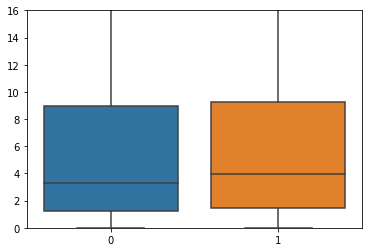

In [64]:
df = pd.DataFrame(distriopentop500l250,columns=['low'])
df2 = pd.DataFrame(distriopentop500h250,columns=['high'])

ax = sb.boxplot(data=[df,df2])
ax.set(ylim=(0, 16))

[(0.0, 16.0)]

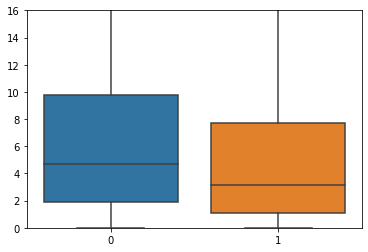

In [65]:
import pandas as pd

df = pd.DataFrame(distrineutop500l250,columns=['low'])
df2 = pd.DataFrame(distrineutop500h250,columns=['high'])

ax = sb.boxplot(data=[df,df2])
ax.set(ylim=(0, 16))

[(0.0, 16.0)]

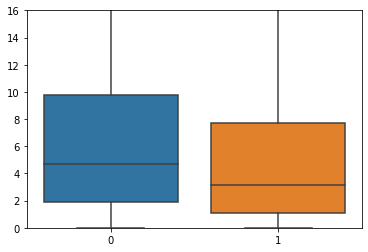

In [66]:
import pandas as pd

df = pd.DataFrame(distrineutop500l250,columns=['low'])
df2 = pd.DataFrame(distrineutop500h250,columns=['high'])

ax = sb.boxplot(data=[df,df2])
ax.set(ylim=(0, 16))

In [67]:
len(df), len(df2)

(251, 252)

In [68]:
# for i in range(49,270):
#     distriopentop500l250,distriopentop500h250 = Get_Users_topandbottom(LastFMtop500, 'open', i)
#     a = mannwhitneyu_bootstrap(distriopentop500l250, distriopentop500h250, 10000)
#     print(a)

## My Analysis

In [69]:
def get_user_ids(dataset, pers, num):
    distril = []
    distrih = [] 
    idsl = []
    idsh = []
    sc = []
    temp1 = {}
    temp2 = {}
    for i in dataset:
        temp1[i] = dataset[i][pers]
        temp2[i] = dataset[i][pers]

    temp1 = dict(sorted(temp1.items(), key=lambda item: item[1], reverse=False))
    temp2 = dict(sorted(temp2.items(), key=lambda item: item[1], reverse=True))

    t = 0
    b = 0
    for i in temp1:
        if dataset[i]['Ext_song_plays'] >= th_songs and dataset[i]['Ext_song_plays']/dataset[i]['Total_song_plays'] >= th_hitrate:
            distril.append(dataset[i]['Instr_unique_song_plays']/dataset[i]['Ext_song_plays'] * 100)
            idsl.append(i)
            sc.append(dataset[i][pers])
        t += 1
        if t == num:
            break

    for i in temp2:
        if dataset[i]['Ext_song_plays'] >= th_songs and dataset[i]['Ext_song_plays']/dataset[i]['Total_song_plays'] >= th_hitrate:
            distrih.append(dataset[i]['Instr_unique_song_plays']/dataset[i]['Ext_song_plays'] * 100)
            idsh.append(i)
            sc.append(dataset[i][pers])

        b += 1
        if b == num:
            break
    return distril, distrih, idsl, idsh, sc


In [70]:
l, h, idsl, idsh, sc = get_user_ids(LastFMtop500, 'neu', 252)

In [71]:
for i in idsh:
    print(LastFMtop500[i]['neu'],LastFMtop500[i]['Ext_song_plays']/LastFMtop500[i]['Total_song_plays'])
print()
for i in idsl:
    print(LastFMtop500[i]['neu'],LastFMtop500[i]['Ext_song_plays']/LastFMtop500[i]['Total_song_plays'])

5.0 0.6914354644149577
5.0 0.9126708362288626
5.0 0.965244099579696
5.0 0.6457843904985644
5.0 0.832901554404145
5.0 0.8327395950994874
5.0 0.8566717402333841
5.0 0.3191489361702128
5.0 0.358957654723127
4.75 0.7092846270928462
4.75 0.8378012048192771
4.75 0.9308860185814638
4.75 0.8820895522388059
4.75 0.6095337327429018
4.75 0.949359572482823
4.75 0.9562492164974301
4.75 0.800452415576022
4.75 0.3776065276518586
4.75 0.9354545454545454
4.75 0.906891495601173
4.75 0.6573538856775851
4.75 0.44789579158316634
4.75 0.9056900345803206
4.75 0.43834178765086584
4.75 0.9838319088319089
4.5 0.552266611467605
4.5 0.73892963868514
4.5 0.9771122473825177
4.5 0.8914898805169471
4.5 0.8406930253220791
4.5 0.7731629392971247
4.5 0.8334375651448822
4.5 0.8152194386890187
4.5 0.9650404676258992
4.5 0.8619928236268286
4.5 0.7503819126183929
4.5 0.49017038007863695
4.5 0.8334766408713098
4.5 0.5388625592417061
4.5 0.8553459119496856
4.5 0.9478225968292193
4.5 0.8173803526448362
4.5 0.8773599873076313
4

#### pkl.dump(idsl, open('../../research/Lastfm_dataset/agridsl.pkl', 'wb'))

In [72]:
# pkl.dump(idsh, open('../../research/Lastfm_dataset/agridsh.pkl', 'wb'))

In [73]:
len(idsl), len(idsh)

(251, 252)

In [74]:
# distrineutop500l250

In [75]:
mannwhitneyu_bootstrap(distrineutop500l250, distrineutop500h250, 10000)

'36115.0, 0.005885702164031216(Low, 0.0051)'

In [76]:
for i in range(50,100):
    distriopentopl250,distriopentoph250 = Get_Users_topandbottom(LastFMtop500, 'open', i)
    a = mannwhitneyu_bootstrap(distriopentopl250, distriopentoph250, 10000)
    print(a)

1177.0, 0.6171258100676769(High, )
1253.0, 0.7530410985341076(High, )
1298.0, 0.727921718013615(High, )
1317.0, 0.5824311146341079(High, )
1347.0, 0.4970754284193576(High, )
1370.0, 0.3958493695930897(High, )
1460.0, 0.531527231425743(High, )
1476.0, 0.40153382177435815(High, )
1485.0, 0.2778412724135023(High, )
1523.0, 0.24275399267008624(High, )
1560.0, 0.20866950593300249(High, )
1586.0, 0.16055768720140984(High, )
1659.0, 0.1895233840151479(High, )
1776.0, 0.3101055746501331(High, )
1837.0, 0.3157280843930834(High, )
1865.0, 0.2500451133761884(High, )
1887.0, 0.18608388240808316(High, )
1940.0, 0.17608527478607516(High, )
2025.0, 0.21237316274122486(High, )
2096.0, 0.22648337625133297(High, )
2201.0, 0.30032505765484196(High, )
2255.0, 0.2795613022340341(High, )
2309.0, 0.25896879605214285(High, )
2369.0, 0.2482164402041619(High, )
2424.0, 0.22922133661670863(High, )
2507.0, 0.25158931252803485(High, )
2580.0, 0.2571291378839846(High, )
2661.0, 0.2735107024809781(High, )
2803.0, 0.

In [77]:
hitrate = []
for i in LastFMLH:
    hitrate.append((LastFMLH[i]['Ext_song_plays']/LastFMLH[i]['Total_song_plays']))


In [78]:
np.mean(np.array(hitrate))

0.7345979219071133

In [79]:
plays = []
for i in LastFMLH:
    plays.append(LastFMLH[i]['Total_song_plays'])

In [80]:
np.mean(np.array(plays))

16033.404805914972

In [81]:
unique = []
for i in LastFMLH:
    unique.append(LastFMLH[i]['Total_songs'])

In [82]:
np.mean(np.array(unique))

5312.1829944547135

In [83]:
uniquei = []
for i in LastFMLH:
    uniquei.append(LastFMLH[i]['Instr_unique_song_plays'])

In [84]:
np.mean(np.array(uniquei))

796.279112754159

In [85]:
instr = []
for i in LastFMLH:
    instr.append(LastFMLH[i]['Instr'])

In [86]:
np.mean(np.array(instr))

306.3086876155268

In [87]:
mann_whitney_u_test(distriopentop500h250,distriopentop500l250)

(32126.0, 0.5344076562943487)

In [88]:
mann_whitney_u_test(distriopentop500l250,distriopentop500h250)

(30124.0, 0.5344076562943487)